### Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importamos nuestros datos a un df

In [2]:
df = pd.read_csv(r'AccidentesAviones.csv')

### Exploración Inicial

In [4]:
df.head()

,Unnamed,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [4]:
#Vemos la dimensión de nuestro dataset
df.shape

(5008, 18)

In [5]:
#Corroboramos existencia de valores nulos
df.isnull().sum()

Unnamed                   0
fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     0
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64

A simple vista parece que no existen valores nulos, pero estos estan expresados con el valor '?' así que luego veremos en concreto esos datos.

In [6]:
#Vemos los tipos de datos correspondientes a nuestros campos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed                 5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

### Renombramos columnas

In [7]:
df = df.rename(columns={
    'fecha': 'Fecha',
    'HORA declarada': 'Hora_accidente', 
    'flight_no': 'Nro_vuelo',
    'route': 'Route',
    'registration': 'Registro',
    'all_aboard': 'Total_a_bordo',
    'OperadOR': 'Operador', 
    'ac_type': 'Tipo_aeronave',
    'PASAJEROS A BORDO': 'Pasajeros_a_bordo', 
    'cantidad de fallecidos': 'Total_fallecidos',
    'passenger_fatalities': 'Pasajeros_fallecidos',
    'crew_fatalities': 'Tripulacion_fallecida',
    'crew_aboard': 'Tripulacion_a_bordo',
    'ground': 'Muertos_tierra',
    'summary': 'Resumen_accidente',
    })

### Dataset consiste en 5008 observaciones (crashes) y 18 atributos, estos son:

*Fecha*: fecha en que se produjo el accidente

*Hora_accidente*: hora que se produjo el accidente

*Ruta*: lugar donde se produjo el accidente

*Operador*: aerolínea de la aeronave

*Nro_vuelo*: número de vuelo

*Route*: ruta tomada en avión

*Tipo_aeronave*: tipo de aeronave

*Registro* -

*cn_ln* - 

*Total_a_bordo*: total personas a bordo

*Pasajeros_a_bordo*: número de pasajeros a bordo

*Triplulacion_a_bordo*: número de tripulación a bordo

*Total_fallecidos*: número total de personas fallecidas

*Pasajeros_fallecidos*: número de pasajeros fallecidos

*Tripulacion_fallecida*: número de tripulación fallecida

*Ground*: número de personas muertas en tierra

*Resumen_accidente*: breve resumen del caso



### Tratamiento de datos

In [8]:
# Eliminar la primer columna ya que es irrelevante para nuestro análisis (enumera filas)
df = df.drop('Unnamed', axis=1)

In [9]:
df.head(1)

,Fecha,Hora_accidente,Ruta,Operador,Nro_vuelo,Route,Tipo_aeronave,Registro,cn_ln,Total_a_bordo,Pasajeros_a_bordo,Tripulacion_a_bordo,Total_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecida,Muertos_tierra,Resumen_accidente
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."


In [10]:
#Cambiamos los datos '?' por valores acorde a cada campo, ya que deduje que son nulos
df['Fecha'] = df['Fecha'].replace('?', np.NaN)
df['Hora_accidente'] = df['Hora_accidente'].replace('?', np.NaN)
df['Ruta'] = df['Ruta'].replace('?', 'Sin dato')
df['Operador'] = df['Operador'].replace('?', 'Sin dato')
df['Nro_vuelo'] = df['Nro_vuelo'].replace('?', 'Sin dato')
df['Route'] = df['Route'].replace('?', 'Sin dato')
df['Tipo_aeronave'] = df['Tipo_aeronave'].replace('?', 'Sin dato')
df['Registro'] = df['Registro'].replace('?', 'Sin dato')
df['cn_ln'] = df['cn_ln'].replace('?', 'Sin dato')
df['Total_a_bordo'] = df['Total_a_bordo'].replace('?', 0)
df['Pasajeros_a_bordo'] = df['Pasajeros_a_bordo'].replace('?', 0)
df['Tripulacion_a_bordo'] = df['Tripulacion_a_bordo'].replace('?', 0)
df['Total_fallecidos'] = df['Total_fallecidos'].replace('?', 0)
df['Pasajeros_fallecidos'] = df['Pasajeros_fallecidos'].replace('?', 0)
df['Tripulacion_fallecida'] = df['Tripulacion_fallecida'].replace('?', 0)
df['Muertos_tierra'] = df['Muertos_tierra'].replace('?', 0)
df['Resumen_accidente'] = df['Resumen_accidente'].replace('?', 'Sin dato')

In [11]:
df.isnull().sum()

Fecha                       0
Hora_accidente           1504
Ruta                        0
Operador                    0
Nro_vuelo                   0
Route                       0
Tipo_aeronave               0
Registro                    0
cn_ln                       0
Total_a_bordo               0
Pasajeros_a_bordo           0
Tripulacion_a_bordo         0
Total_fallecidos            0
Pasajeros_fallecidos        0
Tripulacion_fallecida       0
Muertos_tierra              0
Resumen_accidente           0
dtype: int64

### Cambios en columnas

In [12]:
#Cambiamos el tipo de dato de 'fecha'
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [13]:
#Convertimos las columnas a tipo numérico
a_entero = ['Total_a_bordo', 'Pasajeros_a_bordo', 'Tripulacion_a_bordo', 'Total_fallecidos', 'Pasajeros_fallecidos', 'Tripulacion_fallecida', 'Muertos_tierra']
df[a_entero] = df[a_entero].astype(int)

In [14]:
#Cambiamos el formato de la columna 'hora declarada'
df['Hora_accidente'] = df['Hora_accidente'].str.slice(0, 2) + ':' + df['Hora_accidente'].str.slice(2)
df['Hora_accidente'] = df['Hora_accidente'].str.replace("c ", "")

Corroboramos los cambios de formato, tipo y si quedan valores nulos aún

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  5008 non-null   datetime64[ns]
 1   Hora_accidente         3504 non-null   object        
 2   Ruta                   5008 non-null   object        
 3   Operador               5008 non-null   object        
 4   Nro_vuelo              5008 non-null   object        
 5   Route                  5008 non-null   object        
 6   Tipo_aeronave          5008 non-null   object        
 7   Registro               5008 non-null   object        
 8   cn_ln                  5008 non-null   object        
 9   Total_a_bordo          5008 non-null   int32         
 10  Pasajeros_a_bordo      5008 non-null   int32         
 11  Tripulacion_a_bordo    5008 non-null   int32         
 12  Total_fallecidos       5008 non-null   int32         
 13  Pas

Creación de nuevas columnas para su posterior visualización

In [16]:
# Creamos nuevas columna con la tasa de mortalidad, tasa de supervivencia y número de sobrevivientes
df['Tasa_mortalidad'] = (df['Total_fallecidos'] / df['Total_a_bordo']) * 100
df['Tasa_supervivencia'] = ((df['Total_a_bordo'] - df['Total_fallecidos']) / df['Total_a_bordo']) * 100
df['Sobrevivientes'] = df['Total_a_bordo'] - df['Total_fallecidos']
#df['Anio'] = pd.DatetimeIndex(df['Fecha']).year



In [17]:
#definimos la funcion split para crear una columna nueva con el lugar del accidente

def split_country(x):
  a = x.split(",")[-1]
  return a.replace(" ", "")


#df2['Location'].apply(split_country)
#  df2['Country'] = df2['Location'].apply(split_country)

In [18]:
df['Locacion'] = df['Ruta'].apply(split_country)

In [19]:
df.head(1)

,Fecha,Hora_accidente,Ruta,Operador,Nro_vuelo,Route,Tipo_aeronave,Registro,cn_ln,Total_a_bordo,...,Tripulacion_a_bordo,Total_fallecidos,Pasajeros_fallecidos,Tripulacion_fallecida,Muertos_tierra,Resumen_accidente,Tasa_mortalidad,Tasa_supervivencia,Sobrevivientes,Locacion
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Sin dato,Demonstration,Wright Flyer III,Sin dato,1,2,...,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",50.0,50.0,1,Virginia


Cantidad de accidentes por año

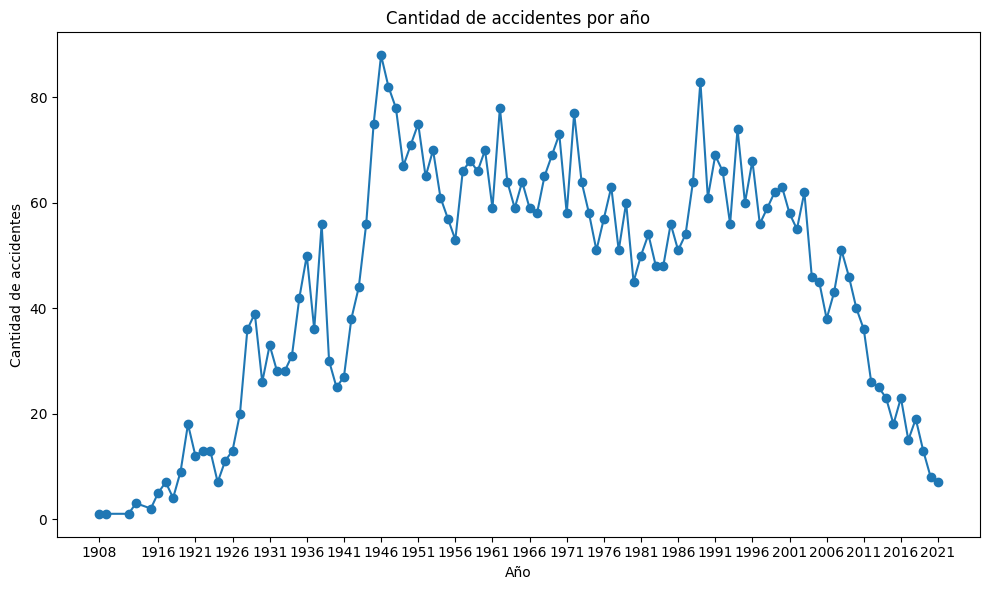

In [20]:
# Calcular la cantidad de accidentes por año
accidentes_por_anio = df.groupby(df['Fecha'].dt.year).size()

# Seleccionar solo algunos años para mostrar en el gráfico
seleccion_anios = accidentes_por_anio.index[::5]  # Cambiar 5 por el intervalo deseado

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(accidentes_por_anio.index, accidentes_por_anio.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes por año')

# Mostrar solo los años seleccionados en el eje x
plt.xticks(seleccion_anios)

plt.tight_layout()
plt.show()


¿Hubo más de un accidente en el mismo día?

In [21]:
df['Fecha'].value_counts()[:6]

1988-08-31    4
2001-09-11    4
1945-02-23    3
1946-12-28    3
1992-08-27    3
1978-09-03    3
Name: Fecha, dtype: int64

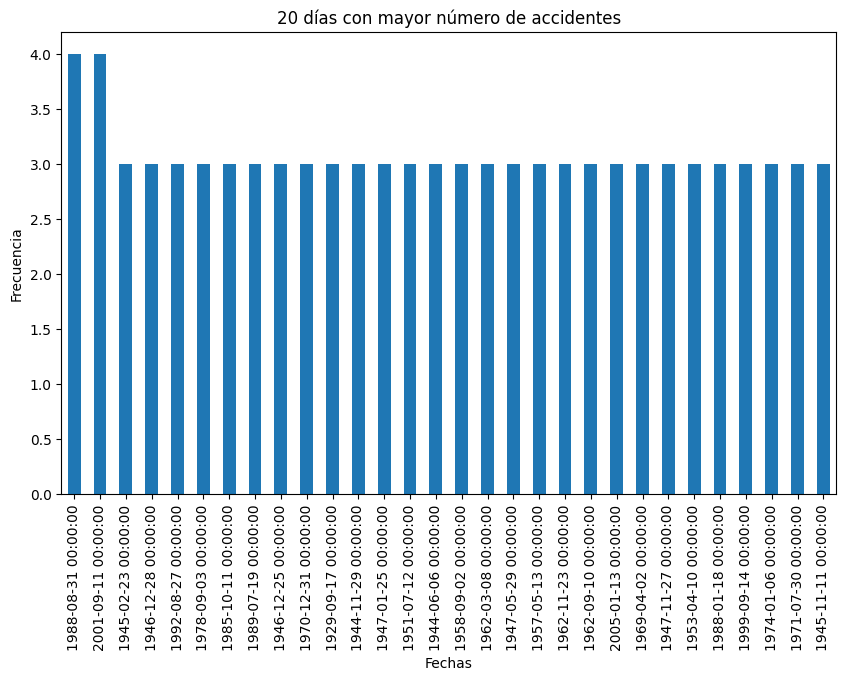

In [22]:
#20 fechas con mas accidentes aereos
accidentes_20 = df['Fecha'].value_counts().head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6)) 
accidentes_20.plot(kind='bar')

# Personalizar el gráfico
plt.title('20 días con mayor número de accidentes')
plt.xlabel('Fechas')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


Las dos fechas con más accidentes en la historia son: 31-08-1988 y 11-09-2001
El 11 de septiembre de 2001 se puede relacionar con los ataques terroristas en Estados Unidos, donde varios aviones comerciales fueron secuestrados y utilizados como armas.

No es raro tener varios (hasta 4) accidentes por día. A partir del 11 de septiembre, hubo 5 fechas más en las que hubo 4 accidentes por día. Parecen una coincidencia aparte del 28-02-1973, cuando en Polonia hubo 2 accidentes por mal tiempo.

**Visializaremos cómo ha cambiado la tasa de supervivencia media a lo largo de los años.**

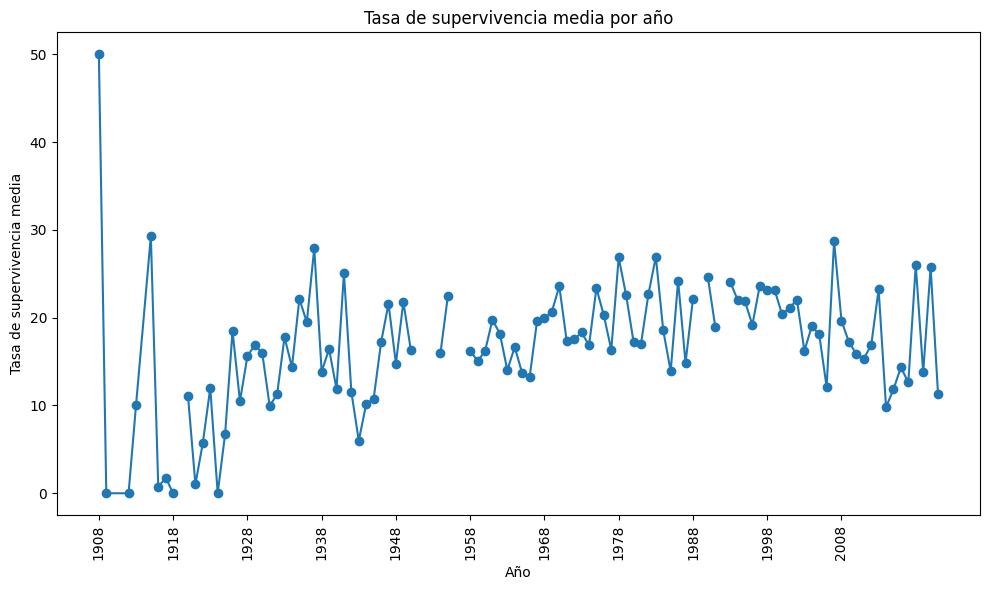

In [23]:
tasa_supervivencia_media_por_anio = df.groupby(df['Fecha'].dt.year)['Tasa_supervivencia'].mean()
tasa_mean = df['Tasa_supervivencia'].mean()

plt.figure(figsize=(10, 6))
plt.plot(tasa_supervivencia_media_por_anio.index, tasa_supervivencia_media_por_anio.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Tasa de supervivencia media')
plt.title('Tasa de supervivencia media por año')
plt.xticks([x for x in range(1908,2009,10)], rotation='vertical')
plt.axhline(y=tasa_mean, color='r', linestyle='-')

plt.tight_layout()
plt.show()

 **tasa de mortalidad**

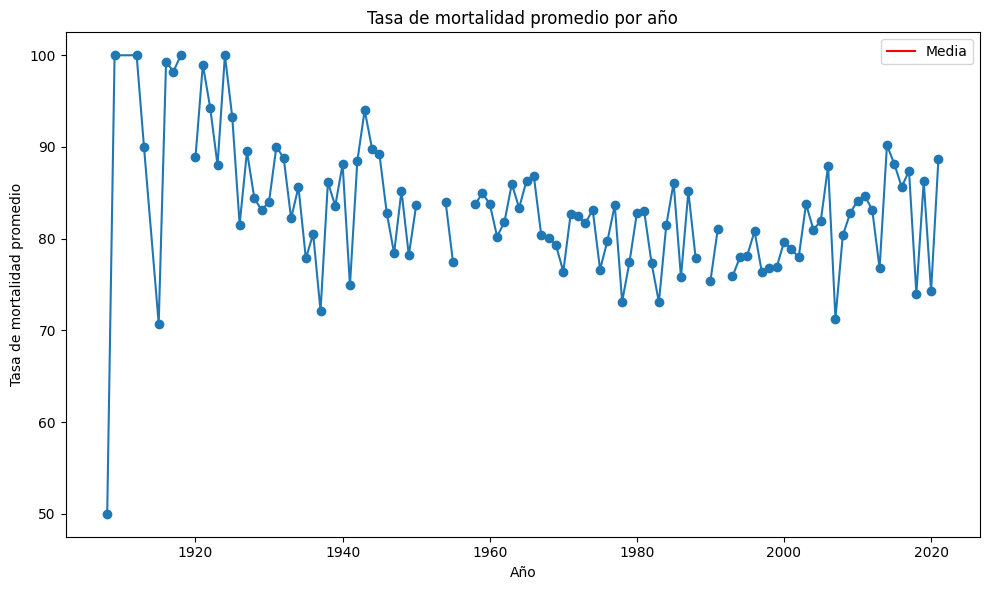

In [24]:
# Calcular la tasa de mortalidad promedio por año
tasa_mortalidad_promedio_por_anio = df.groupby(df['Fecha'].dt.year)['Tasa_mortalidad'].mean()

# Calcular la media de la tasa de mortalidad
media_tasa_mortalidad = df['Tasa_mortalidad'].mean()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(tasa_mortalidad_promedio_por_anio.index, tasa_mortalidad_promedio_por_anio.values, marker='o')
plt.axhline(media_tasa_mortalidad, color='r', linestyle='-', label='Media')
plt.xlabel('Año')
plt.ylabel('Tasa de mortalidad promedio')
plt.title('Tasa de mortalidad promedio por año')
plt.legend()

plt.tight_layout()
plt.show()


### Explorando las operadoras


¿Qué operador tiene más aviones estrellados?

In [25]:
df['Operador'].value_counts()

Aeroflot                            253
Military - U.S. Air Force           141
Air France                           74
Deutsche Lufthansa                   63
United Air Lines                     44
                                   ... 
Sierra Pacific Airlines               1
Pathet Lao Airlines                   1
Military - West German Air Force      1
Cessnyca                              1
Kamchatka Aviation Enterprise         1
Name: Operador, Length: 2268, dtype: int64

¿Qué operador tiene más fatalidades?

<AxesSubplot: xlabel='Operador'>

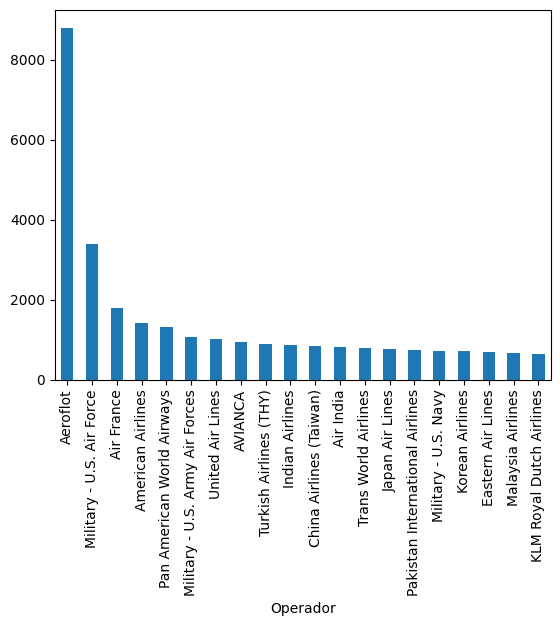

In [27]:
df.groupby(['Operador'])['Total_fallecidos'].sum().sort_values( ascending=False).head(20).plot.bar()

*La aerolinea con el mayor número de accidentes es Aeroflot, seguido de Military U.S Air force*

Analizando en particular a la aerolinea *Aeroflot*

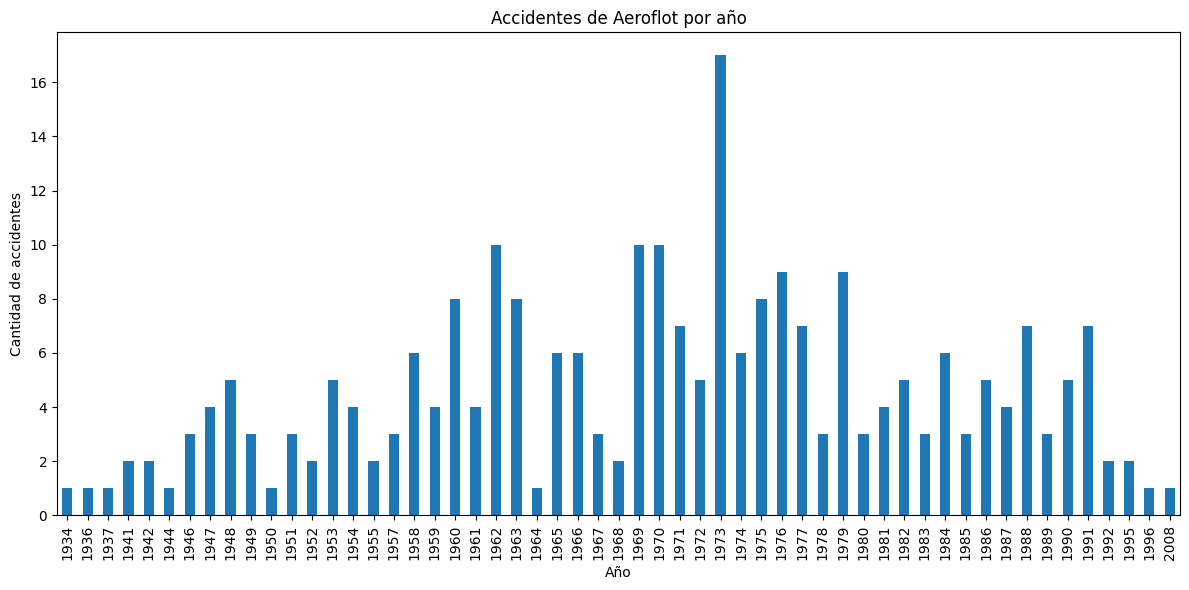

In [26]:
# Filtrar los accidentes de la aerolínea "Aeroflot"
filtro_aeroflot = df['Operador'] == "Aeroflot"

# Agrupar los accidentes de "Aeroflot" por año y contar la cantidad de accidentes por año
accidentes_aeroflot_por_anio = df.loc[filtro_aeroflot].groupby(df['Fecha'].dt.year).size()

# Crear el gráfico de barras
plt.figure(figsize=[12, 6])
accidentes_aeroflot_por_anio.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.title('Accidentes de Aeroflot por año')

plt.tight_layout()
plt.show()


¿Cuál es el peor accidente aéreo (mayor fatalidad) para cada operador?

In [27]:
df.groupby(['Operador'])['Total_fallecidos'].max().sort_values( ascending=False)

Operador
Pan American World Airways / KLM                583
Japan Air Lines                                 520
Saudi Arabian Airlines / Kazakhstan Airlines    349
Turkish Airlines (THY)                          346
Air India                                       329
                                               ... 
Ararat Avia                                       0
American International Airways                    0
Allied Air                                        0
Air Transat                                       0
Centurian Air Cargo                               0
Name: Total_fallecidos, Length: 2268, dtype: int32

Los dos accidentes más grandes por número de muertes incluyen factores humanos. Puede ver los detalles a continuación.

In [28]:
id_of_max_Fatalities = df['Total_fallecidos'].sort_values().dropna().index

In [29]:
df.loc[id_of_max_Fatalities[-1]].Resumen_accidente

'Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The KLM captain was their safety officer and for some months had  been training other pilots using a simulator, where getting takeoff permission was not simulated. The Pan Am aircraft was named Clipper 

In [30]:
df.loc[id_of_max_Fatalities[-2]].Resumen_accidente

'The aircraft suffered an aft pressure bulkhead failure at 23,900 ft. The aircraft had severe control difficulties with loss of all controls and eventually after 40 minutes, collided with a mountain. Improper repair of the  bulkhead while being supervised by Boeing engineers after a tail strike in 1978. Worst single plane disaster in aviation history. Kyu Sakamoto, 43, famous for his Japanese song "Sukiyaki" was killed in the accident.'

¿En qué accidente sobrevivió la mayoría de las personas?

In [31]:
max_survive_index = df['Sobrevivientes'].idxmax()
df.loc[max_survive_index]


Fecha                                                  1999-07-23 00:00:00
Hora_accidente                                                       11:25
Ruta                                                          Tokyo, Japan
Operador                                                All Nippon Airways
Nro_vuelo                                                               61
Route                                        Tokyo, Japan - Chitose, Japan
Tipo_aeronave                                                 Boeing B-747
Registro                                                            JA8966
cn_ln                                                           27442/1066
Total_a_bordo                                                          517
Pasajeros_a_bordo                                                      503
Tripulacion_a_bordo                                                     14
Total_fallecidos                                                         1
Pasajeros_fallecidos     

¿Cuál fue la causa de este accidente?

In [32]:
df['Resumen_accidente'].loc[max_survive_index]

'Two minutes after taking off from Haneda Airport, a man carrying a knife forced a flight attendant to take him in the cockpit of the plane.  A fan of computer flight-simulation games, he stated he just wanted to fly a real plane.  After forcing the co-pilot out of the cockpit he ordered the captain to fly to a U.S. Air Force base in western Tokyo. When he refused, he stabbed the captain and seized the controls. After a sudden drop in altitude, the co-pilot and an off duty crew member entered the cockpit and overpowered the hijacker.  A one point the plane plunged to within 984 feet of the ground. The plane ultimately  landed safely but the captain died of his injuries.'

In [33]:
df.to_csv('df_final.csv', index=False)